In [1]:
import pandas as pd
import json
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import statistics

In [11]:
def read_stats(protocol,codec,video,length,beta):
    name = f"result-{codec}-{video}"
    if length == 2:
        name += "-2sec"
    if beta:
        name += "--beta"
    name += f"-{protocol}"
    tries = 0
    data = {
        "num_stall": [],
        "dur_stall": []
    }
    try:
        while True:
            path = f"../../results/{name}-{str(tries+1)}.json"
            with open(path) as f:
                d = json.load(f)
                data["num_stall"].append(d["num_stall"])
                data["dur_stall"].append(d["dur_stall"])
                print(path, d["dur_stall"])
            tries += 1
    except:
        pass
    if len(data["num_stall"]) > 1:
        print("STD. DEV. (num_stall) = ", statistics.stdev(data["num_stall"]))
        print("STD. DEV. (dur_stall) = ", statistics.stdev(data["dur_stall"]))
    else:
        print("Only 1 try")
    data["num_stall"] = sum(data["num_stall"])/len(data["num_stall"])
    data["dur_stall"] = sum(data["dur_stall"])/len(data["dur_stall"])
    return data


../../results/result-hevc-BBB--beta-tcp-1.json 16.099924087524414
../../results/result-hevc-BBB--beta-tcp-2.json 16.38892674446106
../../results/result-hevc-BBB--beta-tcp-3.json 15.945120811462402
../../results/result-hevc-BBB--beta-tcp-4.json 16.093219995498657
../../results/result-hevc-BBB--beta-tcp-5.json 13.977815866470337
../../results/result-hevc-BBB--beta-tcp-6.json 13.784809112548828
../../results/result-hevc-BBB--beta-tcp-7.json 14.79000186920166
../../results/result-hevc-BBB--beta-tcp-8.json 15.183558225631714
../../results/result-hevc-BBB--beta-tcp-9.json 15.435183763504028
../../results/result-hevc-BBB--beta-tcp-10.json 14.378692150115967
../../results/result-hevc-BBB--beta-tcp-11.json 15.497371912002563
../../results/result-hevc-BBB--beta-tcp-12.json 14.239026069641113
../../results/result-hevc-BBB--beta-tcp-13.json 13.78354787826538
../../results/result-hevc-BBB--beta-tcp-14.json 13.52427077293396
../../results/result-hevc-BBB--beta-tcp-15.json 12.370076894760132
../../re

{'BETA(1-sec)': 14.686185109615327, 'TASQ(1-sec)': 16.00491516213668}

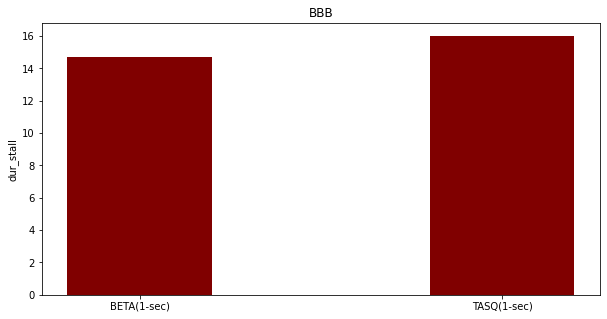

In [18]:
video = "BBB"
codec = "hevc"
prop = "dur_stall"

data = {}
data["BETA(1-sec)"] = read_stats("tcp",codec, video, 1, True)[prop]
data["TASQ(1-sec)"] = read_stats("quic",codec, video, 1, True)[prop]
# data["BETA(2-sec)"] = read_stats("tcp",codec, video, 2, True)[prop]
# data["TASQ(2-sec)"] = read_stats("quic",codec, video, 2, True)[prop]
display(data)      
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
# plt.xlabel("Courses offered")
plt.ylabel(prop)
plt.title(video)
plt.show()


../../results/result-hevc-BBB--beta-quic-1.json 13.709197044372559
../../results/result-hevc-BBB--beta-quic-2.json 13.666515827178955
../../results/result-hevc-BBB--beta-quic-3.json 13.499924898147583
../../results/result-hevc-BBB--beta-quic-4.json 14.01919174194336
../../results/result-hevc-BBB--beta-quic-5.json 13.668361186981201
../../results/result-hevc-BBB--beta-quic-6.json 13.948677778244019
../../results/result-hevc-BBB--beta-quic-7.json 18.223701000213623
../../results/result-hevc-BBB--beta-quic-8.json 18.073304891586304
../../results/result-hevc-BBB--beta-quic-9.json 18.173444986343384
STD. DEV. (num_stall) =  0.0
STD. DEV. (dur_stall) =  2.208129464751904
../../results/result-hevc-BBB--beta-tcp-1.json 13.527272939682007
../../results/result-hevc-BBB--beta-tcp-2.json 15.332703828811646
../../results/result-hevc-BBB--beta-tcp-3.json 14.923534154891968
../../results/result-hevc-BBB--beta-tcp-4.json 15.239654064178467
../../results/result-hevc-BBB--beta-tcp-5.json 15.342743158340

,TASQ/BETA(1-sec)
BBB,1.652702


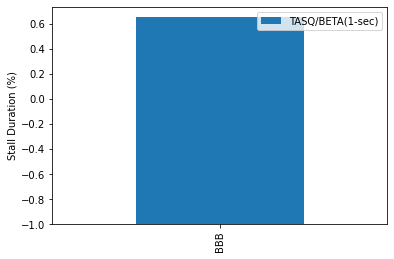

In [15]:
codec = "hevc"
prop = "dur_stall"

groups = []
videos = [
    # 'Aspen', 
    'BBB', 
    # "Burn", 
    # "Football"
]

def percentage(a,b):
    return (a-b)*100/b

for video in videos:
    data = []
    data.append(percentage(read_stats("quic", codec, video, 1, True)[prop], read_stats("tcp", codec, video, 1, True)[prop]))
    # data.append(percentage(read_stats("quic", codec, video, 1, True)[prop], read_stats("tcp", codec, video, 1, False)[prop]))
    # data.append(percentage(read_stats("quic", codec, video, 2, True)[prop], read_stats("tcp", codec, video, 2, True)[prop]))
    # data.append(percentage(read_stats("quic", codec, video, 2, True)[prop], read_stats("tcp", codec, video, 2, False)[prop]))
    groups.append(data)


# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=videos)
# df
df = df.rename(columns={
    0:"TASQ/BETA(1-sec)",
    # 1:"TASQ/DASH(1-sec)",
    # 2:"TASQ/BETA(2-sec)",
    # 3:"TASQ/DASH(2-sec)",
})
ax = df.plot.bar(bottom=-1)
ax.set_ylabel("Stall Duration (%)")
# ax.set_ylim(-1)
df

In [ ]:
# Throughput formula
# Buffer level
# bytes_transferred
# Plot playback segment by segment